#### 필터링을 직접 진행해보자
* 앞 선 노트북을 통해 필터링 해야할 단어를 추출 했다.
* 이제 직접 필터링을 진행해 광고글이나 관련 없는 질문 글 등을 제거해보자.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/title_output.csv")
df = df.drop_duplicates(['title'],keep='first') #중복 처리를 해준다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37508 entries, 0 to 38570
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            37508 non-null  object 
 1   author        37508 non-null  object 
 2   title_vader   37508 non-null  float64
 3   title         37508 non-null  object 
 4   selftext      18115 non-null  object 
 5   created_utc   37508 non-null  int64  
 6   num_comments  37508 non-null  int64  
 7   score         37508 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 2.6+ MB


#### 우리가 제거해야 할 것들
> 광고성 글로 인식되는 단어들
1. url이 포함된 게시글
2. 광고성 단어가 포함된 게시글 들
3. 긍정적이거나 부정적 단어가 활용됐지만, 의문문의 형태로 끝나는 문장들

> 광고성 단어들
* link,card,paypal,mine,platform,browser,site 등..

In [4]:
def remove_pattern(df, patt, column_name):
    patt_find = df[column_name].str.findall(patt, flags = re.IGNORECASE)
    valid_index = np.where(patt_find.apply(len) == 0, True, False)
    return valid_index

In [5]:
import re
column_name = 'title'
url_patt = "(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?$"
patt  = r'\bfree\b|\binstall\b|\bdownload\b|\bapp\b|\bwallet\b|\bhardware\b|\blink\b|\bcard\b|\bpayapl\b|\bmine\b|\bplatform\b|\bbrowser\b|\bsite\b'
word_index = remove_pattern(df, patt, column_name)
url_index = remove_pattern(df,url_patt,column_name)
title_to_remove = df.loc[(word_index & url_index) == False, ['title','title_vader']]

In [6]:
title_to_remove

,title,title_vader
26,🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥 Get on start for FREE 5$ Just ...,-0.9950
41,WTF is wrong with the Coinstats app?,-0.8240
46,"""End the FUD"" - A site with a compilation of l...",-0.8109
57,🔥🔥AquaLove Token🔥🔥 @Aqualovetoken Fighting the...,-0.8555
98,WTF happening with blockchain.com platform ???...,-0.8253
...,...,...
38555,These group helps with registration to a platf...,0.9360
38558,Made a bitcoin trivia game. Put a lot of love ...,0.9150
38559,Interested in trading using bitcoin to earn ou...,0.9062
38567,How to use your PC wisely? Let it earn some BT...,0.9107


In [7]:
title_to_remove.describe()

,title_vader
count,4091.000000
mean,0.328464
std,0.512984
min,-0.995000
25%,-0.051600
50%,0.510600
75%,0.754000
max,0.996900


(array([ 18.,  65.,  80., 117., 100., 175., 132., 138., 156., 261.,   6.,
        137., 177., 181., 217., 529., 376., 322., 514., 390.]),
 array([-9.95000e-01, -8.95405e-01, -7.95810e-01, -6.96215e-01,
        -5.96620e-01, -4.97025e-01, -3.97430e-01, -2.97835e-01,
        -1.98240e-01, -9.86450e-02,  9.50000e-04,  1.00545e-01,
         2.00140e-01,  2.99735e-01,  3.99330e-01,  4.98925e-01,
         5.98520e-01,  6.98115e-01,  7.97710e-01,  8.97305e-01,
         9.96900e-01]),
 <BarContainer object of 20 artists>)

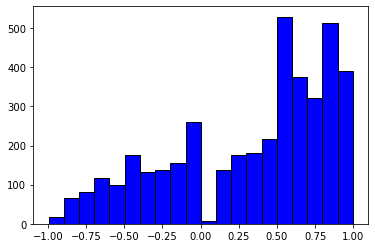

In [8]:
#삭제해야할 글에 vader value 분포
plt.hist(title_to_remove['title_vader'],color='blue',edgecolor='black',bins = int(20))

#### 광고성 단어를 포함하지 않는 문장을 선별해보니..
* 약 4000개 가까이 되는 문장들이 사라졌다는 것을 볼 수 있다.

In [9]:
df = df.drop(['selftext'],axis=1) #결측치가 많은 self text 컬럼을 제외하고 광고성 타이틀을 전부 제거해준다.

In [13]:
df.drop(title_to_remove.index,inplace=True) #remove none-valid data from original data

In [14]:
df

,id,author,title_vader,title,created_utc,num_comments,score
0,nb2fwa,drinksonu,-0.9360,Fuck tesla and fuck elon too. Bitch ass,1620861686,0,1
1,nkqhsj,BuildItMakeIt,-0.9153,Bitcoin price falling ensures that fraudulent ...,1621951391,14,1
2,ng5cju,chjfbcudbdhdb,-0.9138,I am going to kill myself! YOU WANNA ROCK AND ...,1621429643,16,1
3,ngkpa8,Capital-Repeat5483,-0.9069,Panic sold at almost exactly the lowest point ...,1621467437,26,1
4,nfsdej,thebottom55555,-0.9001,Sell sell sell buy safemoon,1621388169,0,1
...,...,...,...,...,...,...,...
38564,gjk1kn,lanbory,0.9100,"A team of cryptocurrency enthusiasts, blockcha...",1589453401,0,1
38565,geep0m,nugget_alex,0.9100,Former IMF Chief Economist Prof Ken Rogoff Cal...,1588746239,3,1
38566,gf82gf,staron79,0.9299,"I'm very interested in buying Bitcoin, what ar...",1588863458,7,1
38568,gmrguc,TCS13579,0.9001,should i invest in proof of trust ltd ?!? PLEA...,1589904419,4,0


####  기존의 38000개에서 4000개 정도 감축 완료
* 광고성 글과 url 포함 게시글을 삭제했더니 약 12% 정도의 글을 걸러낼 수 있었다.

(array([ 250.,  910., 1825., 1771., 2048., 1804., 2560., 1352., 1759.,
        3300.,  362., 1743., 1659., 2506., 1572., 1557., 1899., 1785.,
        1657., 1098.]),
 array([-0.9881  , -0.888775, -0.78945 , -0.690125, -0.5908  , -0.491475,
        -0.39215 , -0.292825, -0.1935  , -0.094175,  0.00515 ,  0.104475,
         0.2038  ,  0.303125,  0.40245 ,  0.501775,  0.6011  ,  0.700425,
         0.79975 ,  0.899075,  0.9984  ]),
 <BarContainer object of 20 artists>)

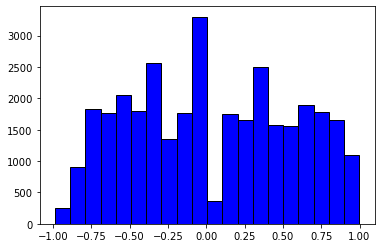

In [18]:
#삭제를 진행한 이후에 vader value 분포
plt.hist(df['title_vader'],color='blue',edgecolor='black',bins = int(20))

#### 학습 데이터를 생성해보자
* vader의 수치가 높은 값들은 정확도가 높을 것이라 가정하고 학습용 데이터를 생성해보자.
* 절대 값이 0.6 이상인 긍정이나 부정의 감정이 뚜렷히 보이는 데이터로만 구축한다.

In [23]:
train_data = df.loc[np.abs(df['title_vader']) > 0.6] 

(array([ 250.,  910., 1825., 1549.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    4., 1899., 1785.,
        1657., 1098.]),
 array([-0.9881  , -0.888775, -0.78945 , -0.690125, -0.5908  , -0.491475,
        -0.39215 , -0.292825, -0.1935  , -0.094175,  0.00515 ,  0.104475,
         0.2038  ,  0.303125,  0.40245 ,  0.501775,  0.6011  ,  0.700425,
         0.79975 ,  0.899075,  0.9984  ]),
 <BarContainer object of 20 artists>)

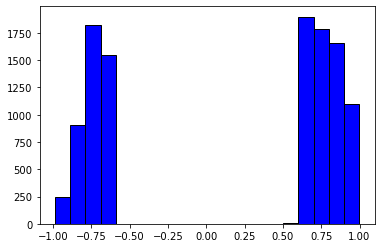

In [24]:
plt.hist(train_data['title_vader'],color='blue',edgecolor='black',bins = int(20))

In [25]:
train_data.describe()

,title_vader,created_utc,num_comments,score
count,10977.000000,1.097700e+04,10977.000000,10977.000000
mean,0.151075,1.609104e+09,14.535301,3.631047
std,0.747174,1.646822e+07,55.989973,60.506516
min,-0.988100,1.577817e+09,0.000000,0.000000
25%,-0.700300,1.594862e+09,0.000000,1.000000
50%,0.636900,1.610489e+09,2.000000,1.000000
75%,0.800200,1.622846e+09,11.000000,1.000000
max,0.998400,1.636030e+09,2735.000000,5026.000000


In [26]:
train_data.to_csv('train_data.csv')